In [75]:
#imports
from scipy.spatial import distance_matrix
from random import randrange
import copy
import matplotlib.pyplot as plt
import imageio
import imageio
import random
from time import time
from tqdm import tqdm

In [76]:
#loading datasets 
import numpy as np
kroa={}
krob={}
np_kroa=[]
np_krob=[]
with open('kroa100.txt') as f:
    lines = f.readlines()
    for line in lines[6:-1]:
        x=list(map(int,line.strip().split(' ')))
        #print(x)
        kroa[x[0]]=(x[1],x[2])
        np_kroa.append((x[1],x[2]))
np_kroa=np.array(np_kroa)
with open('krob100.txt') as f:
    lines = f.readlines()
    for line in lines[6:-1]:
        x=list(map(int,line.strip().split(' ')))
        #print(x)
        krob[x[0]]=(x[1],x[2])
        np_krob.append((x[1],x[2]))

np_kroa=np.array(np_kroa)
np_krob=np.array(np_krob)

#calculating distance matrix - https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance_matrix.html
dista=distance_matrix(np_kroa,np_kroa)
distb=distance_matrix(np_krob,np_krob)

In [77]:
#plotting functions
def plotResult(np_dots, cycles):
    plt.plot(np_dots[:,0][cycles[0][0]], np_dots[:,1][cycles[0][0]], "o", markersize=12)
    plt.plot(np_dots[:,0][cycles[1][0]], np_dots[:,1][cycles[1][0]], "o", markersize=12)
    plt.plot(np_dots[:,0][cycles[0]], np_dots[:,1][cycles[0]], "->")
    plt.plot(np_dots[:,0][cycles[1]], np_dots[:,1][cycles[1]], "->")
    plt.show()
    
def plotPartResult(np_dots, cycles,i):
    plt.plot(np_dots[:,0][cycles[0][0]], np_dots[:,1][cycles[0][0]], "o", markersize=12)
    plt.plot(np_dots[:,0][cycles[1][0]], np_dots[:,1][cycles[1][0]], "o", markersize=12)
    plt.plot(np_dots[:,0][cycles[0]], np_dots[:,1][cycles[0]], "->")
    plt.plot(np_dots[:,0][cycles[1]], np_dots[:,1][cycles[1]], "->")
    plt.plot(np_dots[:,0], np_dots[:,1], ".")
    plt.savefig(f'plots/{i}.png')
    plt.show()    
def calcDistance(currentCycle, dist):
    distance = 0
    for x,y in zip(currentCycle, [*currentCycle[1:], currentCycle[0]]):
        distance += dist[x][y]
    return distance 

In [78]:
# 1st variable - Start cycle - with random assignments
def start_cycle_random(dataset_choice="kroa"):
#     if dataset_choice=="kroa":
#         dataset=np_kroa
#         dic=kroa
#         dist=copy.deepcopy(dista)
#         dist_stable=copy.deepcopy(dista)
#     else:
#         dataset=np_krob
#         dic=krob
#         dist=copy.deepcopy(distb)
#         dist_stable=copy.deepcopy(distb)
#     candidates=np.arange(0,100,1)
#     #print(candidates)
    cycles={}
#     cycles[0]=[randrange(100)]
#     print(len(candidates))
#     candidates=np.delete(candidates, cycles[0][0])
#     cycles[1]=[(np.argsort(dist[cycles[0][0]])[-2])]
#     print(cycles[1],len(candidates))
#     candidates=np.delete(candidates, cycles[1][0])
#     chosenCycle=1
#     for i in range(0,98):
#         chosenCycle = int((chosenCycle + 1)%2)
#         chosenElementIndex = np.random.randint(len(candidates))
#         #print(chosenElementIndex,len(candidates),candidates[chosenElementIndex])
#         #cycles[chosenCycle]=np.insert(cycles[chosenCycle],candidates[chosenElementIndex])
#         cycles[chosenCycle]=np.concatenate((cycles[chosenCycle], [candidates[chosenElementIndex]]), axis=0)
#         candidates=np.delete(candidates, chosenElementIndex)
    cycles[0]=np.random.choice(100,50,replace=False)
    cycles[1]=np.array([i for i in np.arange(0,100,1) if i not in cycles[0]])
    np.random.shuffle(cycles[1])
    return cycles


In [79]:
# 1st variable - Start cycle - with nearest neighbour method
def start_cycle_heuristic(dataset_choice="kroa"):
    results=[]
    min_result=np.inf
    max_result=0
    if dataset_choice=="kroa":
        dataset=np_kroa
        dic=kroa
        dist=copy.deepcopy(dista)
        dist_stable=copy.deepcopy(dista)
    else:
        dataset=np_krob
        dic=krob
        dist=copy.deepcopy(distb)
        dist_stable=copy.deepcopy(distb)


    #zmiana dystansu przekątnej na nieskonczonosc
    np.fill_diagonal(dist, np.inf)

    cycles={}
    cycles[0]=[randrange(100)]
    cycles[1]=[(np.argsort(dist[cycles[0][0]])[-2])]

    for b in range(2):
        dist[:,int(cycles[b][0])]=np.inf

    chosenCycle=1
    for i in range(0,98):
        chosenCycle = int((chosenCycle + 1)%2)
        candidates=[]
        for z,index in enumerate(cycles[chosenCycle]):
            candidates.append((np.argmin(dist[index]),np.min(dist[index]),z))
        candidates=np.array(candidates)
        x=np.argmin(candidates[:,1])
        cycles[chosenCycle]=np.insert(cycles[chosenCycle],int(candidates[x,2]),int(candidates[x,0]))
        dist[:,int(candidates[x,0])]=np.inf
    
    #print(f"cycle[0]: {calcDistance(cycles[0], dist_stable)}")
    #print(f"cycle[1]: {calcDistance(cycles[1], dist_stable)}")
    
    #SAVING RESULTS 
    results.append(calcDistance(cycles[0],dist_stable)+calcDistance(cycles[1],dist_stable))
    if results[-1]>max_result:
        max_result=results[-1]
    if results[-1]<min_result:
        min_result=results[-1]
#         plt.clf()
#         plt.plot(dataset[:,0][cycles[0][0]], dataset[:,1][cycles[0][0]], "o", markersize=12)
#         plt.plot(dataset[:,0][cycles[1][0]], dataset[:,1][cycles[1][0]], "o", markersize=12)
#         plt.plot(dataset[:,0][cycles[0]], dataset[:,1][cycles[0]], "->")
#         plt.plot(dataset[:,0][cycles[1]], dataset[:,1][cycles[1]], "->")
#         plt.savefig(f'best_NN_{dataset_choice}.png')
    return cycles

In [80]:
# 2nd variable - Find more optimal solution
# switch parameter defines how u find neighbour solutions (is it change_vertices or change_edges func)
def greedy_search(dist, np_dots, init_random = False, switch="change_edges"):
    #specify cycles initialization.
    if init_random:
        cycles = start_cycle_random()
    else:
        cycles = start_cycle_heuristic()
        
    #print(cycles)
    
    if switch == "change_vertices":
        internal_change = change_vertices
    elif switch == "change_edges":
        internal_change = change_edges
    else:
        print(f"Unknow mode {switch}. Select change_vertices or change_edges")
        return
    
    
    
    bestDistance = 0
    bestDistance += calcDistance(cycles[0], dist) 
    bestDistance += calcDistance(cycles[1], dist) 
    #print(f"Initial distance: {bestDistance}")
    
    #plotPartResult(np_dots, cycles)
    
    
    done = False
    while not done:
        done = True
        #-------------calculating possible moves
        possible_moves = []
        
        mesh = np.array(np.meshgrid(cycles[0], cycles[1]))
        combinations = mesh.T.reshape(-1, 2)
        for x in combinations:
            possible_moves.append(["external", x])

        mesh = np.array(np.meshgrid(cycles[0], cycles[0]))
        mesh = np.concatenate((mesh,np.array(np.meshgrid(cycles[1], cycles[1]))),axis=0)
        combinations = mesh.T.reshape(-1, 2)
        for x in combinations:
            possible_moves.append(["internal", x])
        
        possible_moves = np.array(possible_moves)
        i = np.random.choice(range(len(possible_moves)),len(possible_moves),replace=False)
        possible_moves = possible_moves[i]
        

        for move, edges in possible_moves:
#             print(move, edges)
            cyclesCopy = copy.deepcopy(cycles)
            edge1 = edges[0]
            edge2 = edges[1]
            
#             print(edge1, edge2)
            if move == "internal":
                cyclesCopy = internal_change(cyclesCopy, edge1, edge2, internally=True)
            else:
                cyclesCopy = change_vertices(cyclesCopy, edge1, edge2, False)
#             plotPartResult(np_dots, cycles)
            currentDistance = 0
            currentDistance += calcDistance(cyclesCopy[0], dist)
            currentDistance += calcDistance(cyclesCopy[1], dist)
            if currentDistance < bestDistance:
                #print(f"New best distance: {currentDistance}, changed {edge1} with {edge2} on {move}")
                cycles = cyclesCopy
                bestDistance = currentDistance
                done = False
                break
    
#     plotPartResult(np_dots, cycles)
#     plt.show()
    return cycles, bestDistance
    

In [81]:
# 2nd variable - Find more optimal solution
def steep_search(dist, np_dots, init_random = False, switch="change_vertices"):
    #specify cycles initialization.
    if init_random:
        cycles = start_cycle_random()
    else:
        cycles = start_cycle_heuristic()
    
    if switch == "change_vertices":
        internal_change = change_vertices
    elif switch == "change_edges":
        internal_change = change_edges
    
    bestDistance = 0
    bestDistance += calcDistance(cycles[0], dist) 
    bestDistance += calcDistance(cycles[1], dist) 
    #print("START",bestDistance)
#     plotResult(np_dots, cycles)
    finish=False
    
    
    
    while not finish:
        
        #-------------calculating possible moves
        mesh = np.array(np.meshgrid(cycles[0], cycles[1]))
        combinations = mesh.T.reshape(-1, 2)
        #print(combinations)
        possible_moves={'external': [combinations]}
        #print("AAA",cycles,possible_moves)
        #print(possible_moves)
        
        mesh = np.array(np.meshgrid(cycles[0], cycles[0]))
        mesh = np.concatenate((mesh,np.array(np.meshgrid(cycles[1], cycles[1]))),axis=0)
        combinations = mesh.T.reshape(-1, 2)
        possible_moves['internal']=[combinations]

        #-------------------finished calculating possible moves
        
        currentbestDist=bestDistance
        finish=True
        for k,v in possible_moves.items():
            for value in v[0]:
                new_cycles=copy.deepcopy(cycles)
                #print("BBBBB",value)
                #print("AAA",value)
                if k=="internal":# and switch=="change_vertices":
                    #print("HAHA",cycles,value[0],value[1])
                    #print(value[0],value[1])
                    new_cycles=internal_change(new_cycles,value[0],value[1],True)
#                 elif k=="internal" and switch=="edges":
#                     pass
#                     new_cycles=change_edges("DO UZUPELNIENIA")
                elif k=="external":
                    #print(value[0],value[1])
                    #print(cycles)
                    new_cycles=change_vertices(new_cycles,value[0],value[1],False)
                currentDist=calcDistance(new_cycles[0], dist) 
                currentDist+=calcDistance(new_cycles[1], dist)
                if currentbestDist>currentDist:
                    supercycles=copy.deepcopy(new_cycles)
                    currentbestDist=currentDist
        if bestDistance!=currentbestDist:       
            cycles=copy.deepcopy(supercycles)
            bestDistance=currentbestDist
            finish=False
#     plotResult(np_dots, cycles)
    return cycles,bestDistance
    
    


In [82]:
#steep_search(dista,np_kroa,switch="change_edges")

In [83]:
# 3rd variable - Generate neighbour solution
#changes vertex internally or externaly between cycles
def change_vertices(cycles, a, b, internally=True):
    if internally:
#         print(len(np.where(cycles[0] == a)))
#         print(np.where(cycles[0] == a))
        cI= 0 if len(np.where(cycles[0] == a)[0])!=0 else 1 
        inA=np.where(cycles[cI] == a)[0][0]
        inB=np.where(cycles[cI] == b)[0][0]
        tmp=cycles[cI][inA]
        cycles[cI][inA]=b
        cycles[cI][inB]=tmp
        #print(cycles[0][inB], cycles[0][inA])
    else:
        cI= 0 if len(np.where(cycles[0] == a)[0])!=0 else 1 
        cI2 = 1-cI
        inA=np.where(cycles[cI] == a)[0][0]
        inB=np.where(cycles[cI2] == b)[0][0]
        tmp=cycles[cI][inA]
        cycles[cI][inA]=b
        cycles[cI2][inB]=tmp
        #pass
    #print(cycles)
    return cycles
    #if aIndex in cycles[0]
    #raise NotImplementedError

In [84]:
# 3rd variable - Generate neighbour solution
#changes edges internally
def change_edges(cycles, edge1, edge2, internally=False): # dummy internally
    cI= 0 if len(np.where(cycles[0] == edge1)[0])!=0 else 1 
#     print(cycles[cI])
    inA=np.where(cycles[cI] == edge1)[0][0]
    inB=np.where(cycles[cI] == edge2)[0][0]
    inA += 1
    inB += 1
    cycle = cycles[cI]
    cycle[inA: inB] = np.flip(cycle[inA: inB])
    return cycles

In [85]:
# algorytm losowego bładzenia który robi losowo wybrany ruch jako punkt odniesienia wzgledem rozwiazan steep search i greedy search
def random_wandering(dist, np_dots, duration, init_random = False, switch="change_edges"):
    #specify cycles initialization.
    if init_random:
        cycles = start_cycle_random()
    else:
        cycles = start_cycle_heuristic()
    
    if switch == "change_vertices":
        internal_change = change_vertices
    elif switch == "change_edges":
        internal_change = change_edges
    else:
        print(f"Unknow mode {switch}. Select change_vertices or change_edges")
        return
    
    bestDistance = 0
    bestDistance += calcDistance(cycles[0], dist) 
    bestDistance += calcDistance(cycles[1], dist) 
#     print(f"Initial distance: {bestDistance}")
    
#     plotPartResult(np_dots, cycles)
    
    startTime = time()
    done = False
    while not done:
        done = True
        while True:
            if random.random() > 0.5:
                cycle = 0
            else:
                cycle = 1

            if random.random() > 0.5:
                edge1 = random.randint(0, 49)
                edge2 = random.randint(edge1, 49)
#                 print(edge1, edge2)
                internal_change(cycles[cycle], edge1, edge2)
            else:
    #             change_vertices()
                pass
#             plotPartResult(np_dots, cycles)
#             currentDistance = 0
#             currentDistance += calcDistance(cycles[0], dist)
#             currentDistance += calcDistance(cycles[1], dist)
            if time() - startTime > duration:
                break
                done = False
    
#     plotPartResult(np_dots, cycles)
#     plt.show()
    
    currentDistance = 0
    currentDistance += calcDistance(cycles[0], dist)
    currentDistance += calcDistance(cycles[1], dist)
    return currentDistance

In [91]:
N = 30

  0%|          | 0/100 [00:00<?, ?it/s]

Search- greedy_search Switch- change_edges Init_random- False Dataset- kroa; time_mean:4.280768418312073,  time_min:2.9263081550598145, time_max:7.55279278755188, min:22590.84479978217, max:29250.112967066358, mean:26460.73137746261


  0%|          | 0/100 [00:00<?, ?it/s]/usr/lib/python3/dist-packages/ipykernel_launcher.py:47: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Search- steep_search Switch- change_edges Init_random- False Dataset- kroa; time_mean:20.639808895587922,  time_min:14.689888715744019, time_max:34.027122497558594, min:23363.541242445208, max:28653.707607888486, mean:26130.944036348534


  0%|          | 0/100 [00:00<?, ?it/s]

Search- greedy_search Switch- change_vertices Init_random- False Dataset- kroa; time_mean:2.424618058204651,  time_min:1.2386586666107178, time_max:5.804328680038452, min:25429.114907937415, max:32908.17981942334, mean:29738.161267438933


  0%|          | 0/100 [00:00<?, ?it/s]/usr/lib/python3/dist-packages/ipykernel_launcher.py:47: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Search- steep_search Switch- change_vertices Init_random- False Dataset- kroa; time_mean:13.885281643867494,  time_min:7.911967515945435, time_max:21.480985641479492, min:25102.350198047905, max:32582.559107815672, mean:29186.917343024747


  0%|          | 0/100 [00:00<?, ?it/s]

Search- greedy_search Switch- change_edges Init_random- True Dataset- kroa; time_mean:11.111941540241242,  time_min:5.888412714004517, time_max:24.354299783706665, min:25757.86553515475, max:30745.281431593387, mean:27832.975740462876


  0%|          | 0/100 [00:00<?, ?it/s]/usr/lib/python3/dist-packages/ipykernel_launcher.py:47: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Search- steep_search Switch- change_edges Init_random- True Dataset- kroa; time_mean:78.98120940208435,  time_min:55.42431378364563, time_max:101.35856938362122, min:25412.14911209126, max:30980.027917750987, mean:27927.438650368524


  0%|          | 0/100 [00:00<?, ?it/s]

Search- greedy_search Switch- change_vertices Init_random- True Dataset- kroa; time_mean:11.164401462078095,  time_min:6.65256667137146, time_max:20.421974420547485, min:32117.09695116987, max:54106.07270138266, mean:41186.07068856743


  0%|          | 0/100 [00:00<?, ?it/s]/usr/lib/python3/dist-packages/ipykernel_launcher.py:47: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Search- steep_search Switch- change_vertices Init_random- True Dataset- kroa; time_mean:81.34675744056702,  time_min:59.176809549331665, time_max:119.87658643722534, min:31692.889961049776, max:53839.05324538179, mean:42006.171417919446


  0%|          | 0/100 [00:00<?, ?it/s]

Search- greedy_search Switch- change_edges Init_random- False Dataset- krob; time_mean:9.817365472316743,  time_min:6.901214599609375, time_max:17.38796615600586, min:26469.27535176387, max:31221.44446398176, mean:28694.80210771059


  0%|          | 0/100 [00:00<?, ?it/s]

Search- steep_search Switch- change_edges Init_random- False Dataset- krob; time_mean:76.51173939943314,  time_min:54.5276997089386, time_max:107.07022166252136, min:25876.007048396947, max:29983.523543183404, mean:28340.944838349806


/usr/lib/python3/dist-packages/ipykernel_launcher.py:47: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
100%|██████████| 100/100 [18:46<00:00, 11.27s/it]


Search- greedy_search Switch- change_vertices Init_random- False Dataset- krob; time_mean:11.266887738704682,  time_min:6.852602243423462, time_max:22.00816249847412, min:33127.07660103998, max:49132.21349158842, mean:41322.23993866614


  0%|          | 0/100 [00:00<?, ?it/s]/usr/lib/python3/dist-packages/ipykernel_launcher.py:47: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Search- steep_search Switch- change_vertices Init_random- False Dataset- krob; time_mean:78.09395537853241,  time_min:55.18137574195862, time_max:109.87416434288025, min:32666.80751616191, max:51554.82485180922, mean:41858.66745576601


  0%|          | 0/100 [00:00<?, ?it/s]

Search- greedy_search Switch- change_edges Init_random- True Dataset- krob; time_mean:8.883990857601166,  time_min:6.682201623916626, time_max:14.618911981582642, min:25761.112154716735, max:30429.218803648437, mean:28490.491630682733


  0%|          | 0/100 [00:00<?, ?it/s]/usr/lib/python3/dist-packages/ipykernel_launcher.py:47: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Search- steep_search Switch- change_edges Init_random- True Dataset- krob; time_mean:70.0664570403099,  time_min:55.97969031333923, time_max:81.78015565872192, min:24917.48903478492, max:31000.15777861535, mean:28500.255718135486


  0%|          | 0/100 [00:00<?, ?it/s]

Search- greedy_search Switch- change_vertices Init_random- True Dataset- krob; time_mean:9.129090530872345,  time_min:6.189558982849121, time_max:16.844975233078003, min:34434.457491729016, max:52149.95525596032, mean:41247.14636776042


100%|██████████| 100/100 [2:11:13<00:00, 78.73s/it] 


Search- steep_search Switch- change_vertices Init_random- True Dataset- krob; time_mean:78.73284432411194,  time_min:61.86693859100342, time_max:109.3830394744873, min:36098.371998571456, max:55849.41008580506, mean:43534.74556160026


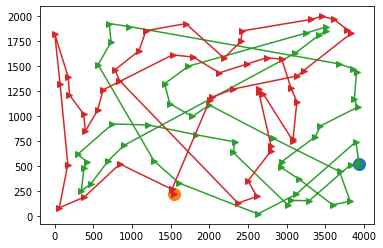

In [92]:
#MAIN - tu poskladac wyzej zaimplementowane funkcje w 8 roznych kombinacji algorytmow i sprawdzic ich czasy i wyplotowac skutecznosci

dataset_choice = "kroa"
init_random = False
switch = "change_edges"
search = greedy_search


for dataset_choice in ['kroa', 'krob']:
    if dataset_choice=="kroa":
        dataset=np_kroa
        dist=copy.deepcopy(dista)
    else:
        dataset=np_krob
        dist=copy.deepcopy(distb)
        
    for init_random in [False, True]:
        for switch in ["change_edges", "change_vertices"]:
            for search in [greedy_search, steep_search]:
                timeTable = []
                distanceTable = []
                cyclesTable = []
                bestDistance = 0
                for _ in tqdm(range(N)):
                    startTime = time()
                    cycles, bestDistance = search(dist, dataset, init_random = init_random, switch=switch)
                    distanceTable.append(bestDistance)
                    cyclesTable.append(cycles)
                    timeTable.append(time() - startTime)
                print(f"Search- {search.__name__} Switch- {switch} Init_random- {init_random} Dataset- {dataset_choice}; time_mean:{np.mean(timeTable)},  time_min:{np.min(timeTable)}, time_max:{np.max(timeTable)}, min:{np.min(distanceTable)}, max:{np.max(distanceTable)}, mean:{np.mean(distanceTable)}")


                plt.clf()
                plt.plot(dataset[:,0][cycles[0][0]], dataset[:,1][cycles[0][0]], "o", markersize=12)
                plt.plot(dataset[:,0][cycles[1][0]], dataset[:,1][cycles[1][0]], "o", markersize=12)                
                plt.plot(dataset[:,0][[*cycles[0],cycles[0][0]]], dataset[:,1][[*cycles[0],cycles[0][0]]], "->")
                plt.plot(dataset[:,0][[*cycles[1],cycles[1][1]]], dataset[:,1][[*cycles[1],cycles[1][1]]], "->")
                
                plt.savefig(f'best_NN_{search.__name__}_random{init_random}_{switch}_{dataset_choice}.png')


In [ ]:
Search- steep_sea
#Search- greedy_search Switch- change_edges Init_random- False Dataset- kroa; time_mean:4.280768418312073,  time_min:2.9263081550598145, time_max:7.55279278755188, min:22590.84479978217, max:29250.112967066358, mean:26460.73137746261
#Search- steep_search Switch- change_edges Init_random- False Dataset- kroa; time_mean:20.639808895587922,  time_min:14.689888715744019, time_max:34.027122497558594, min:23363.541242445208, max:28653.707607888486, mean:26130.944036348534
#Search- greedy_search Switch- change_vertices Init_random- False Dataset- kroa; time_mean:2.424618058204651,  time_min:1.2386586666107178, time_max:5.804328680038452, min:25429.114907937415, max:32908.17981942334, mean:29738.161267438933
#Search- steep_search Switch- change_vertices Init_random- False Dataset- kroa; time_mean:13.885281643867494,  time_min:7.911967515945435, time_max:21.480985641479492, min:25102.350198047905, max:32582.559107815672, mean:29186.917343024747
#Search- greedy_search Switch- change_edges Init_random- True Dataset- kroa; time_mean:11.111941540241242,  time_min:5.888412714004517, time_max:24.354299783706665, min:25757.86553515475, max:30745.281431593387, mean:27832.975740462876
#Search- steep_search Switch- change_edges Init_random- True Dataset- kroa; time_mean:78.98120940208435,  time_min:55.42431378364563, time_max:101.35856938362122, min:25412.14911209126, max:30980.027917750987, mean:27927.438650368524
#Search- greedy_search Switch- change_vertices Init_random- True Dataset- kroa; time_mean:11.164401462078095,  time_min:6.65256667137146, time_max:20.421974420547485, min:32117.09695116987, max:54106.07270138266, mean:41186.07068856743
#Search- steep_search Switch- change_vertices Init_random- True Dataset- kroa; time_mean:81.34675744056702,  time_min:59.176809549331665, time_max:119.87658643722534, min:31692.889961049776, max:53839.05324538179, mean:42006.171417919446
#krob
#Search- greedy_search Switch- change_edges Init_random- False Dataset- krob; time_mean:9.817365472316743,  time_min:6.901214599609375, time_max:17.38796615600586, min:26469.27535176387, max:31221.44446398176, mean:28694.80210771059
#Search- steep_search Switch- change_edges Init_random- False Dataset- krob; time_mean:76.51173939943314,  time_min:54.5276997089386, time_max:107.07022166252136, min:25876.007048396947, max:29983.523543183404, mean:28340.944838349806
#Search- greedy_search Switch- change_vertices Init_random- False Dataset- krob; time_mean:11.266887738704682,  time_min:6.852602243423462, time_max:22.00816249847412, min:33127.07660103998, max:49132.21349158842, mean:41322.23993866614

In [ ]:
#MAIN - tu poskladac wyzej zaimplementowane funkcje w 8 roznych kombinacji algorytmow i sprawdzic ich czasy i wyplotowac skutecznosci

dataset_choice = "kroa"
init_random = False
switch = "change_edges"
search = random_wandering
duration=

for dataset_choice in ['kroa', 'krob']:
    if dataset_choice=="kroa":
        dataset=np_kroa
        dist=copy.deepcopy(dista)
    else:
        dataset=np_krob
        dist=copy.deepcopy(distb)
        
    for init_random in [False, True]:
        timeTable = []
        distanceTable = []
        cyclesTable = []
        bestDistance = 0
        for _ in tqdm(range(N)):
            startTime = time()
            cycles, bestDistance = search(dist, dataset, init_random = init_random, switch=switch)
            distanceTable.append(bestDistance)
            cyclesTable.append(cycles)
            timeTable.append(time() - startTime)
        print(f"Random_wandering- {search.__name__} Switch- {switch} Init_random- {init_random} Dataset- {dataset_choice}; time_mean:{np.mean(timeTable)},  time_min:{np.min(timeTable)}, time_max:{np.max(timeTable)}, min:{np.min(distanceTable)}, max:{np.max(distanceTable)}, mean:{np.mean(distanceTable)}")


        plt.clf()
        plt.plot(dataset[:,0][cycles[0][0]], dataset[:,1][cycles[0][0]], "o", markersize=12)
        plt.plot(dataset[:,0][cycles[1][0]], dataset[:,1][cycles[1][0]], "o", markersize=12)                
        plt.plot(dataset[:,0][[*cycles[0],cycles[0][0]]], dataset[:,1][[*cycles[0],cycles[0][0]]], "->")
        plt.plot(dataset[:,0][[*cycles[1],cycles[1][1]]], dataset[:,1][[*cycles[1],cycles[1][1]]], "->")

        plt.savefig(f'Random_wanderingbest_NN_{search.__name__}_random{init_random}_{switch}_{dataset_choice}.png')
